In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#start the data analysis and clean the data

In [4]:
df = pd.read_csv("/content/911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


In [5]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
51083,40.084625,-75.195340,FLOURTOWN AVE & E GRAVERS LN; SPRINGFIELD; St...,19038.0,EMS: FRACTURE,2016-04-20 11:32:01,SPRINGFIELD,FLOURTOWN AVE & E GRAVERS LN,1.0
51084,40.235252,-75.655804,KLINE AVE & LINDBERG AVE; CHESTER COUNTY; Sta...,19465.0,EMS: OVERDOSE,2016-04-20 11:32:01,CHESTER COUNTY,KLINE AVE & LINDBERG AVE,1.0
51085,40.134031,-75.307400,ARCH RD & RENEL RD; PLYMOUTH; 2016-04-20 @ 11:...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-04-20 11:32:02,PLYMOUTH,ARCH RD & RENEL RD,1.0
51086,40.134031,-75.307400,ARCH RD & RENEL RD; PLYMOUTH; 2016-04-20 @ 11:...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-04-20 11:32:02,PLYMOUTH,ARCH RD & RENEL RD,1.0
51087,40.186499,-75.427554,TOWNSHIP LINE RD & LISA LN; LOWER PROVIDENCE;...,19426.0,EMS: UNKNOWN MEDICAL EMERGE,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51088 entries, 0 to 51087
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        51088 non-null  float64
 1   lng        51088 non-null  float64
 2   desc       51088 non-null  object 
 3   zip        44529 non-null  float64
 4   title      51088 non-null  object 
 5   timeStamp  51087 non-null  object 
 6   twp        51065 non-null  object 
 7   addr       50788 non-null  object 
 8   e          51087 non-null  float64
dtypes: float64(4), object(5)
memory usage: 3.5+ MB


In [7]:
df.describe()

,lat,lng,zip,e
count,51088.000000,51088.000000,44529.000000,51087.0
mean,40.160981,-75.319193,19237.903344,1.0
std,0.092477,0.162835,291.407584,0.0
min,32.387090,-86.276106,17752.000000,1.0
25%,40.101746,-75.398379,19038.000000,1.0
50%,40.146497,-75.306233,19401.000000,1.0
75%,40.230852,-75.212915,19446.000000,1.0
max,41.167156,-75.000755,36107.000000,1.0


In [8]:
df.isna().sum()

,0
lat,0
lng,0
desc,0
zip,6559
title,0
timeStamp,1
twp,23
addr,300
e,1


In [9]:
len(df.columns)

9

In [10]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
#Drop all rows with any missing values from the DataFrame and modify the DataFrame in place.
df.dropna(inplace = True)

In [13]:
df.isna().sum()

,0
lat,0
lng,0
desc,0
zip,0
title,0
timeStamp,0
twp,0
addr,0
e,0


In [14]:
# Convert timeStamp to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Create new columns for better analysis
df['Year'] = df['timeStamp'].dt.year
df['Month'] = df['timeStamp'].dt.month
df['Day'] = df['timeStamp'].dt.day
df['Hour'] = df['timeStamp'].dt.hour
df['Weekday'] = df['timeStamp'].dt.day_name()

In [15]:
# Split title into "Category" and "Subcategory"
df[['Category', 'Subcategory']] = df['title'].str.split(': ', expand=True)

In [16]:
# Top 10 most common townships
top_townships = df['twp'].value_counts().head(10)

#Visualizations:

####Plot: Distribution of emergency categories

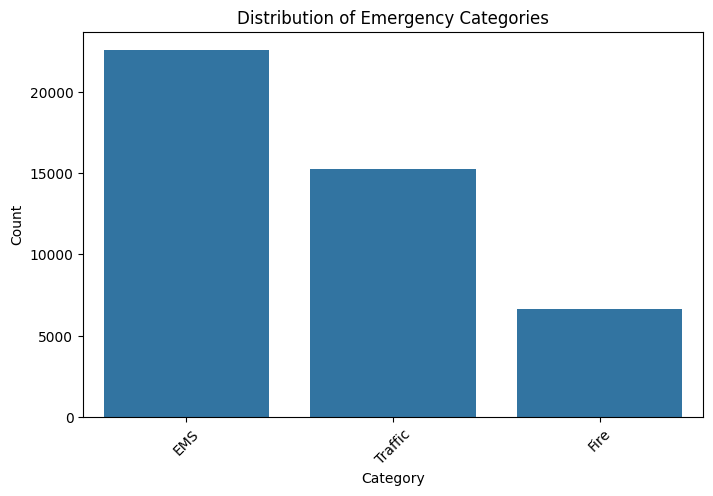

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Distribution of Emergency Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Plot: Emergency calls by hour

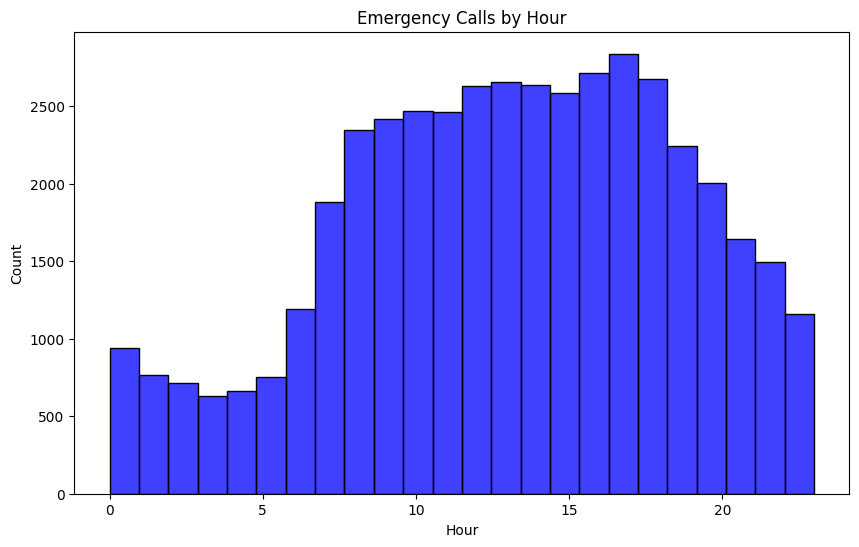

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Hour', bins=24, kde=False, color='blue')
plt.title('Emergency Calls by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

####Heatmap: Calls by Weekday and Hour

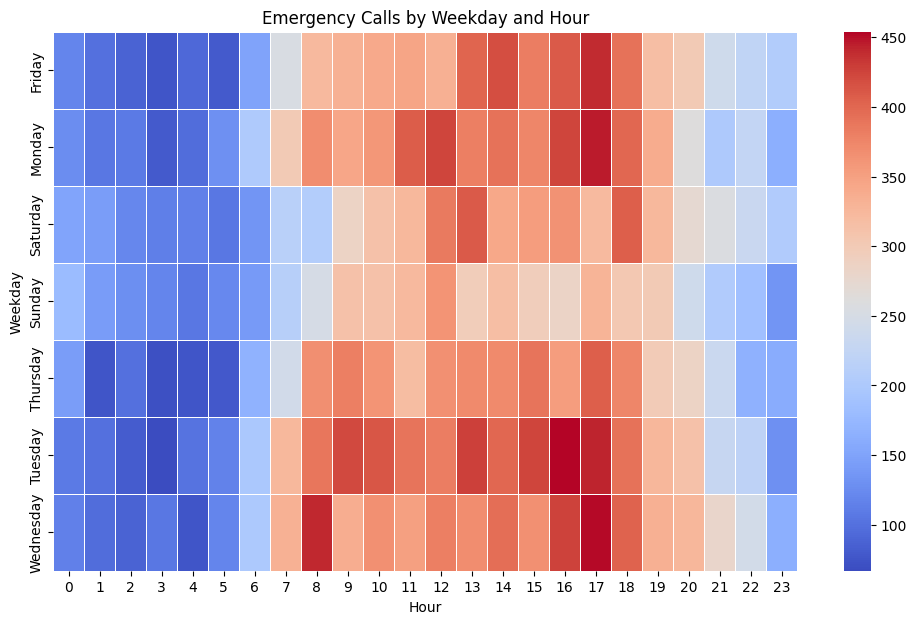

In [19]:
heatmap_data = df.pivot_table(index='Weekday', columns='Hour', values='e', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Emergency Calls by Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.show()


####Plot: Emergency Calls by Month and Category (Title)

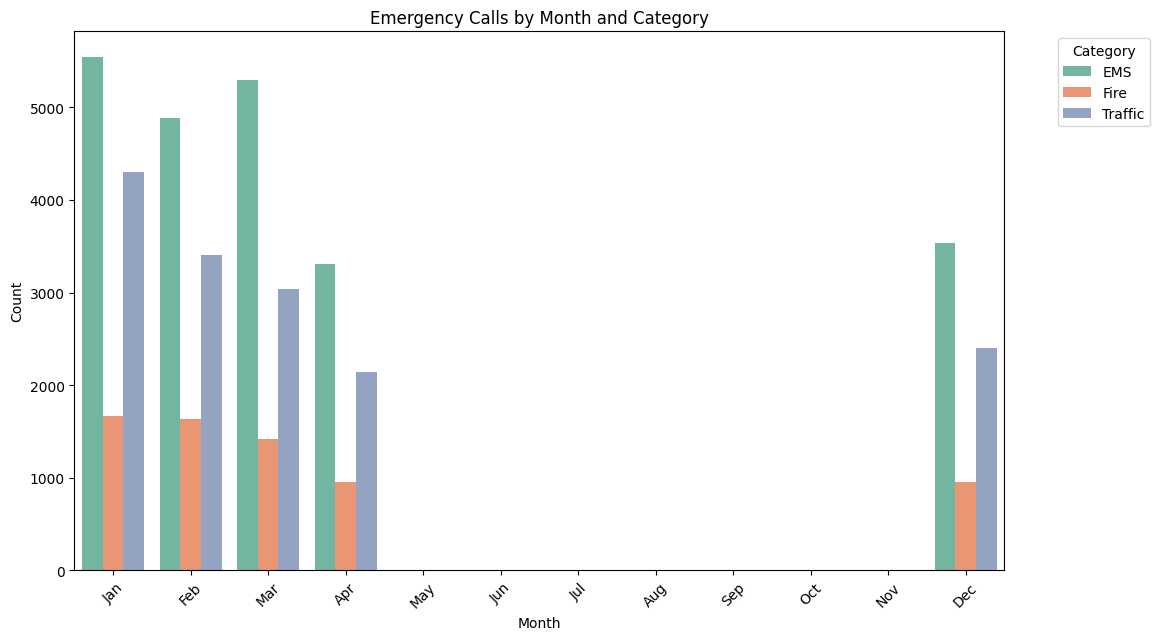

In [20]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Month', hue='Category', order=range(1, 13), palette='Set2')
plt.title('Emergency Calls by Month and Category')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

####Plot: Top 10 townships with most calls

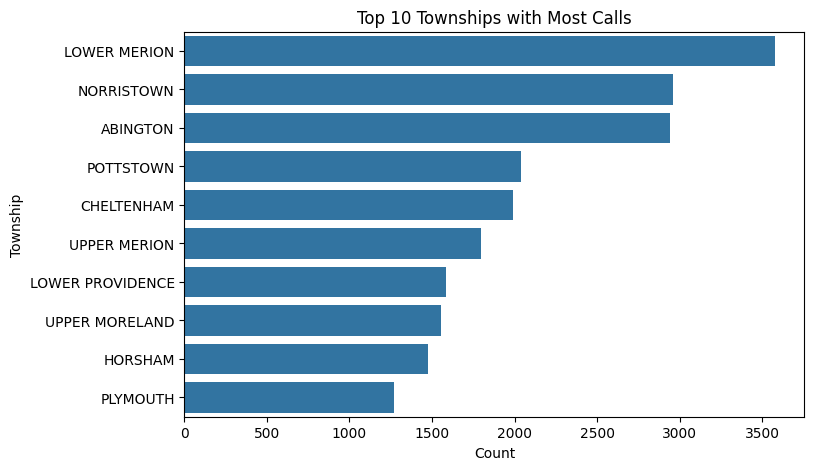

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_townships.values, y=top_townships.index)
plt.title('Top 10 Townships with Most Calls')
plt.xlabel('Count')
plt.ylabel('Township')
plt.show()

# Summary Statistics

In [22]:
print("\nSummary of Emergency Categories:")
print(df['Category'].value_counts())


Summary of Emergency Categories:
Category
EMS        22574
Traffic    15290
Fire        6631
Name: count, dtype: int64


In [23]:
print("\nTop 10 Townships:")
print(top_townships)


Top 10 Townships:
twp
LOWER MERION        3577
NORRISTOWN          2962
ABINGTON            2943
POTTSTOWN           2039
CHELTENHAM          1988
UPPER MERION        1794
LOWER PROVIDENCE    1586
UPPER MORELAND      1557
HORSHAM             1477
PLYMOUTH            1269
Name: count, dtype: int64


In [24]:
print("\nData Overview:")
print(df.describe(include='all'))


Data Overview:
                 lat           lng  \
count   44495.000000  44495.000000   
unique           NaN           NaN   
top              NaN           NaN   
freq             NaN           NaN   
mean       40.161936    -75.317924   
min        32.387090    -86.276106   
25%        40.104077    -75.400041   
50%        40.146561    -75.304568   
75%        40.233398    -75.206874   
max        40.479853    -75.000755   
std         0.093796      0.164502   

                                                     desc           zip  \
count                                               44495  44495.000000   
unique                                              44479           NaN   
top     TWIN SILO DR & MORRIS RD;  WHITPAIN; Station 3...           NaN   
freq                                                    2           NaN   
mean                                                  NaN  19237.902349   
min                                                   NaN  18036.000000   
25